# **Quantum Circuits**
***



If you do not have Qiskit ready for use on your computer, please check out the installation guide.

In order to make sure that all cells of code run properly throughout this lesson, please run the following cell of code below:

In [ ]:
from qiskit import QuantumRegister , ClassicalRegister, QuantumCircuit , Aer , execute
from qiskit.visualization import visualize_transition
import numpy as np
import math as m
S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

# **Qiskit Quantum Gates**
***

In [ ]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import visualize_transition
import numpy as np
import math

List of commonly used single-qubit gates in Qiskit

|Names | Example | Notes |
--- | --- | --- |
|I, Identity| qc.id(0) or qc.i(0)|Applies I gate to qubit 0.|
|H, Hadamard | qc.h(0) | Applies H gate to qubit 0.|
|X|qc.x(0)|Applies X gate to qubit 0.|
|Y|qc.y([0,1,2])|Applies Y gates to qubits 0, 1, and 2.|
|Z|qc.z(0)|Applies Z gate to qubit 0. Equivalent to P gate with π phase rotation.|
|P, Phase|qc.p(math.pi/2,0)|Applies P gate with π/2 phase rotation to qubit 0.|
|S|qc.s(0)|Applies S gate to qubit 0. Equivalent to P gate with π/2 phase rotation.|
|S†|qc.sdg(0)|Applies S† gate to qubit 0. Equivalent to P gate with 3π/2 phase rotation.|
|SX|qc.sx(0)|Applies SX (square root of X) gate to qubit 0. Equivalent to RX gate with π/2 rotation.|
|T|qc.t(0)|Applies T gate to qubit 0. Equivalent to P gate with π/4 phase rotation.|
|T†|qc.tdg(0)|Applies T† gate to qubit 0. Equivalent to P gate with 7π/4 phase rotation.|
|RX|qc.rx(math.pi/4,0)|Applies RX gate with π/4 rotation to qubit 0.|
|RY|qc.ry(math.pi/8,0)|Applies RY gate with π/8 rotation to qubit 0.|
|RZ|qc.rz(math.pi/2,0)|Applies RZ gate with π/2 rotation to qubit 0.|
|U|qc.u(math.pi/2,0,math.pi,5)|Applies rotation with 3 Euler angles to qubit 5.|

## **Single Qubit Gates**
***

### Identity(I)

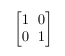

The effect of this gate renders the qubit’s state unchanged.

In [ ]:
qreg_q = QuantumRegister(1,'q')

I_qc = QuantumCircuit(qreg_q,name='qc')

I_qc.id(qreg_q[0])

### Hadamard(H)

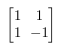

The effect of this gate is as follows:

H$|0⟩$ = $1/\sqrt{2} \space (|0⟩ + |1⟩) $

H$|1⟩$ = $1/\sqrt{2} \space (|0⟩ - |1⟩) $

This gate results in a qubit being in a 50 / 50 superposition of states $|0⟩$ and $|1⟩$.

In [ ]:
qreg_q = QuantumRegister(1,'q')

H_qc = QuantumCircuit(qreg_q,name='qc')

H_qc.h(qreg_q[0])

visualize_transition(circuit = H_qc)

### Pauli Operators
***

#### X

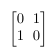

The effect of this gate is to flip a qubit’s state between $|0⟩$ and $|1⟩$. This gate can be thought of the quantum analog to flipping a
classical bit (the NOT gate). In systems with many superposition states, this gate will be very useful in isolating particular states
for future operations.

In [ ]:
qreg_q = QuantumRegister(1,'q')

X_qc = QuantumCircuit(qreg_q,name='qc')

X_qc.x(qreg_q[0])

visualize_transition(circuit = X_qc) 
#'''Visualization function for animation of state transitions by applying gates to single qubit.'''

#### Y


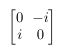

The effect of this gate is to flip a qubit’s $|0⟩$ and $|1⟩$ amplitudes and multiplies by an imaginary number (phase). From a
probabilities perspective, this gate has the same effect as the X gate. However, the additional phase makes this gate very useful
in creating certain constructive / deconstructive interferences.

In [ ]:
qreg_q = QuantumRegister(1,'q')

Y_qc = QuantumCircuit(qreg_q,name='qc')

Y_qc.y(qreg_q[0])

visualize_transition(circuit = Y_qc, trace=True)    
#'''Args: trace (bool): Controls whether to display tracing vectors - history of 10 past vectors at each step of the animation.'''



#### Z

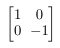

The effect of this gate leaves a qubit’s $|0⟩$ amplitude unchanged, while multiplying by -1 (phase) to a qubit’s $|1⟩$ amplitude. The
power of this gate comes from the fact that it only affects the $|1⟩$ component, which will be frequently used for picking out
certain states in the system while leaving others unaltered.

In [ ]:
qreg_q = QuantumRegister(1,'q')

Z_qc = QuantumCircuit(qreg_q,name='qc')

Z_qc.h(qreg_q[0])         # Applying H gate first for better visualization

Z_qc.z(qreg_q[0])

visualize_transition(circuit = Z_qc, fpg=30)    
#'''Args:fpg (int): Frames per gate. Finer control over animation smoothness and computational needs to render the animation. Works well for tkinter GUI as it is, for jupyter GUI it might be preferable to choose fpg between 5-30.'''



### Phase Gates
***

The following series of gates are all single qubit operations, which multiply a qubit’s $|1⟩$ state component by a phase. Doing so does not change the probability of the system, but is an essential component for algorithms that rely on particular kinds of interference.

#### Phase ($R_{Φ}$)

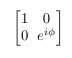

A gate similar to the Z gate. It leaves a qubit’s $|0⟩$ amplitude unchanged, while multiplying by a phase $e^{iΦ}$ to a qubit’s $|1⟩$ amplitude. In Qiskit, this gate goes by the name ’$U_1$’. This gate will find many of the same uses as the Z gate, picking out certain states while leaving others unchanged. However, the extra degree of phase is a powerful tool for creating certain interference effects.

In [ ]:
qreg_q = QuantumRegister(1,'q')

Rphi_qc = QuantumCircuit(qreg_q,name='qc')

Rphi_qc.h(qreg_q[0])              # Applying H gate first for better visualization

Rphi_qc.p(math.pi/4, qreg_q[0])

#visualize_transition(circuit = Rphi_qc, fpg=30) 
#'''The QuantumCircuit.u1 method is deprecated so don't worry if it shows error on running.'''

#### S

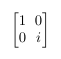

A pre-defined gate for $R_{\phi}$ , $\phi = π/2$ . It leaves a qubit’s $|0⟩$ amplitude unchanged, while multiplying by i (phase) to a qubit’s $|1⟩$ amplitude.

In [ ]:
qreg_q = QuantumRegister(1,'q')

S_qc = QuantumCircuit(qreg_q,name='qc')

S_qc.h(qreg_q[0])         # Applying H gate first for better visualization

S_qc.s(qreg_q[0])

visualize_transition(circuit = S_qc, fpg=30)

Exercise: Implement the visualization of $S^{†}$ gate. 

Note SX gate is not implemented in visualize_transition function

Check out all possible gates allowed in visualize_transition function by going through the implementation, link to which is given in references

#### T

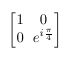

A pre-defined gate for $R_\phi$ , $\phi= \pi/4$ . It leaves a qubit’s $|0⟩$ amplitude unchanged, while multiplying by i (phase) to a qubit’s $|1⟩$
amplitude.

In [ ]:
qreg_q = QuantumRegister(1,'q')

T_qc = QuantumCircuit(qreg_q,name='qc')

T_qc.h(qreg_q[0])         # Applying H gate first for better visualization

T_qc.t(qreg_q[0])

visualize_transition(circuit = T_qc, fpg=30)

Exercise: Implement the visualization of  T†  gate.

### Rotation Gates
***

The follow gates all represent rotations of a state on a Bloch Sphere.

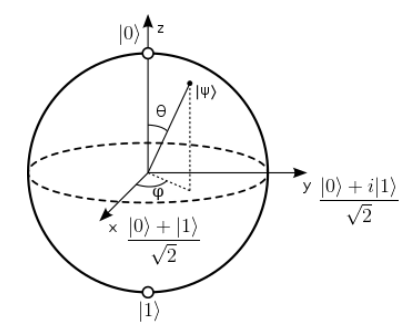

#### $R_x$ ($\theta$)

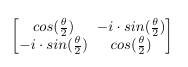

A rotation gate where the initial and final states can be represented as $\theta$ rotation around the x-axis on a Bloch Sphere.

In [ ]:
qreg_q = QuantumRegister(1,'q')

Rx_qc = QuantumCircuit(qreg_q,name='qc')

Rx_qc.rx(math.pi/8,qreg_q[0])

visualize_transition(circuit = Rx_qc,trace=True, fpg=30)

#### $R_y$ ($\theta$)

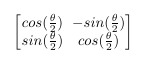

A rotation gate where the initial and final states can be represented as $\theta$ rotation around the y-axis on a Bloch Sphere.

In [ ]:
qreg_q = QuantumRegister(1,'q')

Ry_qc = QuantumCircuit(qreg_q,name='qc')

Ry_qc.ry(3*math.pi/8,qreg_q[0])

visualize_transition(circuit = Ry_qc,trace=True, fpg=30)

#### $R_z$ ($\theta$)

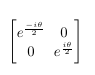

A rotation gate where the initial and final states can be represented as $\theta$ rotation around the z-axis on a Bloch Sphere.

In [ ]:
qreg_q = QuantumRegister(1,'q')

Rz_qc = QuantumCircuit(qreg_q,name='qc')

Rz_qc.h(qreg_q[0])         # Applying H gate first for better visualization

Rz_qc.rz(3*math.pi/4,qreg_q[0])

visualize_transition(circuit = Rz_qc,trace=True, fpg=30)

## **Making a Measurement**

In [ ]:
from qiskit import QuantumRegister , ClassicalRegister , QuantumCircuit , Aer , execute

qreg_q = QuantumRegister(1,'q')
creg_c = ClassicalRegister(1,'c')

qc = QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.measure(qreg_q,creg_c)

job = execute(qc,M_simulator)
result = job.result()
result.get_counts(qc)

This code should look very similar to our earlier examples, but with a few key differences.

***
qc.h(qreg_q[0])   
qc.measure(qreg_q,creg_c)
***

In the first line, we initialize qubit 0 with a Hadamard gate, creating a system in the following state:


$$1/\sqrt{2} \space (|0⟩ + |1⟩) $$

So far nothing new. Then, in the next line we add our **measurement**, using the function measure. This function actually calls upon the class **Measure**, which handles adding the measurement instruction. measure takes two arguments, both the quantum and classical registers.

Note that by using the measure function, we are adding an additional instruction to our QuantumCircuit. That is to say, we aren’t actually making a measurement with this line of code. Remember, a QuantumCircuit object is just a list of instructions, which aren’t actually carried out until we run it on some simulator. Speaking of backends, because we now have a measurement instruction, the backend that we need to call upon is:

***
M_simulator = Aer.backends(name=’qasm simulator’)[0]
***

Before, we used the statevector simulator because we were interested in viewing our wavefunction. Now, we don’t care about the wavefunction, so we will instead use **qasm_simulator**, which will allow us to simulate measurements on our quantum state. Note that both of these simulators are still classical, and do not call upon any real quantum devices. We won’t go through the full details of the Aer backend function again here, but we are essentially calling upon qasm_simulator in the exact same way as before, so please see the earlier example if you are unsure as to what this line of code is doing.

The last three lines of code should look familiar as well: 

***
job = execute(qc, M_simulator)   
result = job.result()    
result.get_counts(qc)
***


Again we are using execute to run our simulation, this time on **M_simulator** because we are interesting in measurement results. This returns to us a job object, from which we extract our result.

Alright, now let’s talk about the interaction between the two registers, via measure. In Qiskit, if we pass the entire quantum and classical registers as arguments to measure, the function will by default make a total measurement on the system, and store each qubit’s measurement results to the corresponding index in the ClassicalRegister:

In [ ]:
qreg_q = QuantumRegister(2,'q')
creg_c = ClassicalRegister(2,'c')

qc = QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.measure(qreg_q,creg_c)

job = execute(qc,M_simulator,shots=100)
result = job.result()
result.get_counts(qc)

If instead we want to only make a partial measurement, say on qubit 0 only, we can do so by specifying the quantum and classical indices:

In [ ]:
qreg_q = QuantumRegister(2,'q')
creg_c = ClassicalRegister(2,'c')

qc = QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.measure(qreg_q[0],creg_c[1])

job = execute(qc,M_simulator)
result = job.result()
result.get_counts(qc)

In the example above, measure( qreg_q[0], creg_c[0] ) can be understood as  make a measurement on qubit 0, and store the result in the ClassicalRegister ’creg_c’ index 0”. The result printed shows that the measurement on a single qubit was successful, after which our system is still left in a superposition of two states (because qubit 1 also had a Hadamard gate).

## **Observing Quantum Circuits**
***

### **qasm** ###

Recall that a QuantumCircuit is essentially a list of instructions, meant to be run on some backend. If at any point we would like to see the contents of our QuantumCircuit, Qiskit comes with a nice function that allows us to print a QuantumCircuit to console, via **qasm**:

In [ ]:
qreg_q = QuantumRegister(2,'q' )
creg_c = ClassicalRegister(2,'c')

qc = QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.measure(qreg_q[0],creg_c[0])

print(qc.qasm())

The function **qasm**, part of the QuantumCircuit class, returns a string that contains all of the instructions stored in a QuantumCircuit. When printed, this string gives us a nice and easy to read visualization of our algorithm.

By using the argument **name**, we can assign customized names as shown above. If we are designing an algorithm that may have multiple registers or quantum circuits, this will be very important.

### **data**

In [ ]:
qreg_q = QuantumRegister(2 ,name= 'q')
creg_c = ClassicalRegister(2 ,name= 'c')

qc = QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.measure(qreg_q[0],creg_c[0])

print("Outfrom from data function: " , qc.data)

### **qregs**

In [ ]:
qreg_q = QuantumRegister(2 ,name= 'q')
creg_c = ClassicalRegister(2 ,name= 'c')

qc = QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.measure(qreg_q[0],creg_c[0])

print("Outfrom from qregs function: " , qc.qregs)

### **cregs**

In [ ]:
qreg_q = QuantumRegister(2 ,name= 'q')
creg_c = ClassicalRegister(2 ,name= 'c')

qc = QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.measure(qreg_q[0],creg_c[0])

print("Outfrom from cregs function: " , qc.cregs)

The code above contains four different functions that can all be used to extract information from a QuantumCircuit. These are
very useful for debugging code, and we encourage you to try them all out.

To summarize what each function does:

1. **qasm** - function for printing everything about a QuantumCircuit object
2. **data** - returns a list object that contains all of the gate / measurement instructions
3. **qregs** - returns a list containing all of the quantum registers
4. **cregs** - returns a list containing all of the classical registers

## **Sharing Registers**
***

Now suppose we are working with an algorithm that utilizes multiple QuantumCircuits. Qiskit allows us to have QuantumCircuit objects interact in a variety of ways, so long as we are careful in defining which registers are a part of which circuits. For example, let’s start with two QuantumCircuits that have no interaction:

In [ ]:
qreg_q1 = QuantumRegister(1 ,name= 'q1')
creg_c1 = ClassicalRegister(1 ,name= 'c1')
qc1 = QuantumCircuit(qreg_q1,creg_c1)

qreg_q2 = QuantumRegister(1 ,name= 'q2')
creg_c2 = ClassicalRegister(1 ,name= 'c2')
qc2 = QuantumCircuit(qreg_q2,creg_c2)

qc1.h(qreg_q1[0])
qc1.measure(qreg_q1[0], creg_c1[0])

qc2.h(qreg_q2[0])

print(qc1.qasm())

print(qc2.qasm())

Nothing too special here. Just two circuits defined parallel to each other. We could choose to pass either of them to a simulator, and their results would be completely independent.


Now, there are a couple ways we can have our two QuantumCircuits interact. For example, we can take measurement results from one circuit (after running it on a simulator) and store them in the other’s ClassicalRegister, or have one circuit apply gate operations on the other’s qubits. BUT, in order to do these kinds of things, we must give each QuantumCircuit access to each other’s registers:

In [ ]:
qreg_q1 = QuantumRegister(1 ,name= 'q1')
creg_c1 = ClassicalRegister(1 ,name= 'c1')
qc1 = QuantumCircuit(qreg_q1,creg_c1)

qreg_q2 = QuantumRegister(1 ,name= 'q2')
creg_c2 = ClassicalRegister(1 ,name= 'c2')
qc2 = QuantumCircuit(qreg_q2,creg_c2)

qc1.add_register(creg_c2)
qc2.add_register(qreg_q1)

qc1.h(qreg_q1[0])
qc2.h(qreg_q2[0])
qc1.measure(qreg_q1[0], creg_c2[0])

qc2.h(qreg_q1[0])

print(qc1.qasm())

print(qc2.qasm())

Take a careful look at these two QuantumCircuits. In ’qc1’, we make sure to include the ClassicalRegister ’creg_2’, so that we can store our measurement result:

***
’measure qreg_q1[0] -> creg_c2[0]’
***

In ’qc2’, we do the same thing for the QuantumRegister ’qreg_q1’, so that we can apply a Hadamard gate:

***
’qc2.h(qreg_q1[0])’.
***



When we go to print each QuantumCircuit with **qasm**, sure enough, we can see that both QuantumCircuit objects have access to the registers we specified. The function that allows us to do this is **add_register**, which belongs to the QuantumCircuit class, taking a register of either type as an argument.

## **Combining QuantumCircuits**
***

In [ ]:
qreg_q1 = QuantumRegister(2 ,name= 'q1')
creg_c1 = ClassicalRegister(2 ,name= 'c1')
qc1 = QuantumCircuit(qreg_q1,creg_c1)

qreg_q2 = QuantumRegister(2 ,name= 'q2')
creg_c2 = ClassicalRegister(2 ,name= 'c2')
qc2 = QuantumCircuit(qreg_q2,creg_c2)

qc1.h(qreg_q1[0])
qc1.h(qreg_q1[1])

qc2.h(qreg_q2[0])
qc2.h(qreg_q2[1])

qc3 = qc1 + qc2

print(qc3.qasm())

qc1 += qc2
print(qc1.qasm())
qc3.draw('mpl')

Both cases in this example produce the same final QuantumCircuit, combining ’qc1’ and ’qc2’. The difference between them, is that in the first case we store the combination of ’qc1 + qc2’ as a new QuantumCircuit, called ’qc3’. In the second case, we actually append all of the instructions stored in ’qc2’, into ’qc1’.

Thus, the + functionality combines two QuantumCircuits, to then be stored in whatever variable we choose, leaving both of the original circuits unchanged. Conversely, += appends all of the instructions from the second circuit onto the first, leaving the second QuantumCircuit unaltered.


Also note that + and += both add the registers as well as the instructions. In both cases, we can see all of the quantum and classical registers are present in the final QuantumCircuits. If we add together multiple QuantumCircuits that share access to same registers, or call upon different ones, these functions will automatically handle things so that the final QuantumCircuit has access to all of the necessary registers.

## **Multiple Qubit Gates**
***

|Names | Example | Notes |
--- | --- | --- |
|CX, CNOT|qc.cx(0,1) or qc.cnot(0,1)|Applies the X gate to quantum wire 1, subject to the state of the control qubit on wire 0.|
|Swap|qc.swap(0,1)|Swaps the qubit states of wires 0 and 1.|
|CCX, Toffoli|qc.ccx(0,1,2)|Applies the X gate to quantum wire 2, subject to the state of the control qubits on wires 0 and 1.|
|CSwap, Fredkin|qc.cswap(0,2,3) or qc.fredkin(0,2,3)|Swaps the qubit states of wires 2 and 3, subject to the state of the control qubit on wire 0.|
|CH|qc.ch(0,1)|Applies the H gate to quantum wire 1, subject to the state of the control qubit on wire 0.|
|CP, Control-Phase|qc.cp(math.pi/4,0,1)|Applies the phase gate to quantum wire 1, subject to the state of the control qubit on wire 0.|
|CRX, Control-RX|qc.crx(math.pi/2,2,3)|Applies the RX gate to quantum wire 3, subject to the state of the control qubit on wire 2.|
|CRY, Control-RY|qc.cry(math.pi/8,2,3)|Applies the RY gate to quantum wire 3, subject to the state of the control qubit on wire 2.|
|CRZ|qc.crz(math.pi/4,0,1)|Applies the RZ gate to quantum wire 1, subject to the state of the control qubit on wire 0.|
|CSX|qc.csx(0,1)|Applies the SX (square root of X) gate to quantum wire 1, subject to the state of the control qubit on wire 0.|
|CU|qc.cu(math.pi/2,0,math.pi,0,0,1)|Applies the U gate with an additional global phase argument to quantum wire 1, subject to the state of the control qubit on wire 0.|
|CY, Control-Y|qc.cy(2,3)|Applies the Y gate to quantum wire 3, subject to the state of the control qubit on wire 2.|
|CZ, Control-Z|qc.cz(1,2)|Applies the Z gate to quantum wire 2, subject to the state of the control qubit on wire 1.|
|DCX|qc.dcx(2,3)|Applies two CNOT gates whose control qubits are on wires 2 and 3.|
|iSwap|qc.iswap(0,1)|Swaps the qubit states of wires 0 and 1, and changes the phase of the $|01⟩$ and $|10⟩$ and  amplitudes by i.|
|MCP, Multi-control phase|qc.mcp(math.pi/4, [0,1,2],3)|Applies the phase gate to quantum wire 3, subject to the state of the control qubits on wires 0, 1, and 2.|
|MCX, Multi-control X|qc.mcx([0,1,2],3)|Applies the X gate to quantum wire 3, subject to the state of the control qubits on wires 0, 1, and 2.|

List of commonly used multiple-qubit gates in Qiskit

# References
1. For additional details about the single qubit gates in Qiskit, you can refer to the Qiskit Textbook's section on the Single Qubit Gates here: 
https://qiskit.org/textbook/ch-states/single-qubit-gates.html 
2. For additional details about visualize_transition, you can refer to the implementation of visualize_transition dunction in Qiskit code here:
https://github.com/Qiskit/qiskit-terra/blob/main/qiskit/visualization/transition_visualization.py 